In [1]:
import importlib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import sys
if os.path.dirname(os.getcwd()) not in sys.path:
    sys.path.insert(0, os.path.dirname(os.getcwd())) # appends parent directory to syspath -> enables import of src

import lib.datalayers as dly
import lib.model as mod
import lib.transformer as trans
importlib.reload(mod)
importlib.reload(dly)
importlib.reload(trans)

<module 'lib.transformer' from 'c:\\Users\\Marlene\\Nextcloud\\DOKUMENTE\\Universität\\Diplomarbeit\\lib\\transformer.py'>

In [6]:
sdir = r'..\data\raw data txt\SUS-1R'

In [8]:
import lib.datalayers as dly
importlib.reload(dly)
dataset = dly.Dataset(sdir, overwrite=True)

Dataset: SUS-1R


Load dataset files: 100%|██████████| 15/15 [00:49<00:00,  3.31s/it]


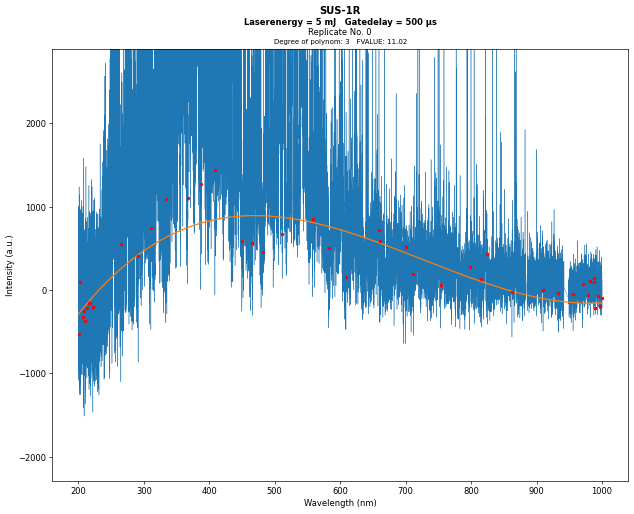

In [17]:
spectrum = dly.Spectrum(dataset, laser_energy=5, gate_delay=500, DEBUG=False)
spectrum.cond.interpolate_dead_pixels()
spectrum.baseline.find_pivot_points()
spectrum.baseline.calculate_regression(deg_min=3)
spectrum.plot_spectrum(view="detail", dpi=60)

In [43]:
b = np.poly1d(spectrum.baseline.coeff_values[::-1])

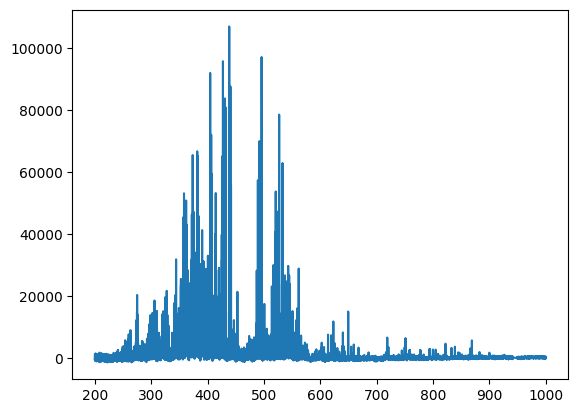

In [46]:
x_shift = trans.ShiftData(x_shift = spectrum.baseline.x_shift).fit_transform(spectrum.cond.x)
corr_y = spectrum.y-b(x_shift)
plt.plot(spectrum.cond.x, corr_y)